In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# path
human_goslim_up_path = '../data/human_annotation/human_annotation_up.tsv'
rice_goslim_up_path = '../data/rice_annotation/rice_annotation_up.tsv'

human_goslim_all_path = '../data/biomart_goslim/biomart_human_goslim_R110.tsv'
rice_goslim_all_path = '../data/biomart_goslim/biomart_rice_goslim_R56.tsv'

In [3]:
human_goslim_up = pd.read_csv(human_goslim_up_path, sep='\t')
rice_goslim_up = pd.read_csv(rice_goslim_up_path, sep='\t')
human_goslim_all = pd.read_csv(human_goslim_all_path, sep='\t')
rice_goslim_all = pd.read_csv(rice_goslim_all_path, sep='\t')

human_goslim_all = human_goslim_all.drop_duplicates(subset=['Gene stable ID', 'GOSlim GOA Accession(s)', 'GOSlim GOA Description'], keep='first').copy()
rice_goslim_all = rice_goslim_all.drop_duplicates(subset=['Gene stable ID', 'GOSlim GOA Accession(s)', 'GOSlim GOA Description'], keep='first').copy()

display(human_goslim_up)
display(rice_goslim_up)
display(human_goslim_all)
display(rice_goslim_all)

/var/folders/7w/6nt3szxj44xdr5xs8y9g8lhw0000gn/T/ipykernel_84717/269868789.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  human_goslim_all = pd.read_csv(human_goslim_all_path, sep='\t')
/var/folders/7w/6nt3szxj44xdr5xs8y9g8lhw0000gn/T/ipykernel_84717/269868789.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  rice_goslim_all = pd.read_csv(rice_goslim_all_path, sep='\t')


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s),GOSlim GOA Description,HN-score(HN5),name
0,ENSG00000173110,1,161524540,161526894,GO:0003824,catalytic activity,245,HSPA6
1,ENSG00000173110,1,161524540,161526894,GO:0005576,extracellular region,245,HSPA6
2,ENSG00000173110,1,161524540,161526894,GO:0140657,ATP-dependent activity,245,HSPA6
3,ENSG00000173110,1,161524540,161526894,GO:0043226,organelle,245,HSPA6
4,ENSG00000173110,1,161524540,161526894,GO:0005856,cytoskeleton,245,HSPA6
...,...,...,...,...,...,...,...,...
1722,ENSG00000184205,X,53082367,53088540,GO:0005730,nucleolus,51,TSPYL2
1723,ENSG00000184205,X,53082367,53088540,GO:0023052,signaling,51,TSPYL2
1724,ENSG00000184205,X,53082367,53088540,GO:0042393,histone binding,51,TSPYL2
1725,ENSG00000184205,X,53082367,53088540,GO:0005694,chromosome,51,TSPYL2


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s),GOSlim GOA Description,HN-score(HN5)
0,Os04g0107900,4,483234,485978,GO:0016787,hydrolase activity,253
1,Os04g0107900,4,483234,485978,GO:0005886,plasma membrane,253
2,Os04g0107900,4,483234,485978,GO:0005515,protein binding,253
3,Os04g0107900,4,483234,485978,GO:0005488,binding,253
4,Os04g0107900,4,483234,485978,GO:0008150,biological_process,253
...,...,...,...,...,...,...,...
2522,Os01g0971800,1,42874273,42875515,GO:0008152,metabolic process,42
2523,Os01g0971800,1,42874273,42875515,GO:0009987,cellular process,42
2524,Os01g0971800,1,42874273,42875515,GO:0008150,biological_process,42
2525,Os01g0971800,1,42874273,42875515,GO:0005634,nucleus,42


,Gene stable ID,Chromosome/scaffold name,start2 (bp),end2 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,ENSG00000243485,1,29554,31109,GO:0031047,gene silencing by RNA
1,ENSG00000284332,1,30366,30503,GO:0031047,gene silencing by RNA
2,ENSG00000186092,1,65419,71585,GO:0023052,signaling
3,ENSG00000186092,1,65419,71585,GO:0060089,molecular transducer activity
4,ENSG00000186092,1,65419,71585,GO:0005886,plasma membrane
...,...,...,...,...,...,...
581396,ENSG00000292372,Y,57207346,57212230,GO:0007010,cytoskeleton organization
581397,ENSG00000292372,Y,57207346,57212230,GO:0008092,cytoskeletal protein binding
581398,ENSG00000292372,Y,57207346,57212230,GO:0031410,cytoplasmic vesicle
581399,ENSG00000292372,Y,57207346,57212230,GO:0043226,organelle


,Gene stable ID,Chromosome/scaffold name,start1 (bp),end1 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,Os01g0100100,1,2983,10815,GO:0006810,transport
1,Os01g0100100,1,2983,10815,GO:0008150,biological_process
2,Os01g0100100,1,2983,10815,GO:0009987,cellular process
3,Os01g0100100,1,2983,10815,GO:0003674,molecular_function
4,Os01g0100100,1,2983,10815,GO:0030234,enzyme regulator activity
...,...,...,...,...,...,...
258565,gene-rps19,Pt,134200,134481,GO:0003674,molecular_function
258566,gene-rps19,Pt,134200,134481,GO:0005198,structural molecule activity
258567,gene-rps19,Pt,134200,134481,GO:0005488,binding
258568,gene-rps19,Pt,134200,134481,GO:0003723,RNA binding


## Fold enrichment

1. GOSlimの数をカウントする （遺伝子とタームが1対1の関係になっているので実質遺伝子数のカウント）
2. Fold enrichmentを計算する


In [4]:
def count_goslim(df, file_name: str):
    unique_gene_term_pairs = df.drop_duplicates(subset=['Gene stable ID', 'GOSlim GOA Accession(s)']) # for debugging
    goslim_counts = unique_gene_term_pairs.groupby(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'])['Gene stable ID'].nunique().reset_index(name='counts')
    goslim_counts = goslim_counts.sort_values(by='counts', ascending=False).copy() # sort by counts
    results_directory = './goslim_counts'
    os.makedirs(results_directory, exist_ok=True)
    goslim_counts.to_csv(f'{results_directory}/{file_name}', sep='\t', index=False)
    return goslim_counts

human_goslim_up_counts = count_goslim(human_goslim_up, 'human_goslim_up_counts.tsv')
human_goslim_all_counts = count_goslim(human_goslim_all, 'human_goslim_all_counts.tsv')
rice_goslim_up_counts = count_goslim(rice_goslim_up, 'rice_goslim_up_counts.tsv')
rice_goslim_all_counts = count_goslim(rice_goslim_all, 'rice_goslim_all_counts.tsv')

display(human_goslim_up_counts)
display(human_goslim_all_counts)
display(rice_goslim_up_counts)
display(rice_goslim_all_counts)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts
87,GO:0043226,organelle,128
15,GO:0005634,nucleus,71
72,GO:0023052,signaling,68
92,GO:0048856,anatomical structure development,63
13,GO:0005576,extracellular region,60
...,...,...,...
85,GO:0042254,ribosome biogenesis,1
78,GO:0031047,gene silencing by RNA,1
71,GO:0022600,digestive system process,1
59,GO:0009975,cyclase activity,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
99,GO:0043226,organelle,18493
19,GO:0005634,nucleus,11009
83,GO:0023052,signaling,7321
36,GO:0005886,plasma membrane,6799
13,GO:0003824,catalytic activity,6372
...,...,...,...
117,GO:0071941,nitrogen cycle metabolic process,13
90,GO:0031386,protein tag,13
123,GO:0120274,virus coreceptor activity,1
66,GO:0007568,aging,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
2,GO:0003674,molecular_function,204
12,GO:0005575,cellular_component,203
41,GO:0008150,biological_process,197
59,GO:0009987,cellular process,153
14,GO:0005622,intracellular anatomical structure,152
...,...,...,...
70,GO:0030154,cell differentiation,1
57,GO:0009856,pollination,1
74,GO:0040007,growth,1
76,GO:0045182,translation regulator activity,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
2,GO:0003674,molecular_function,18866
16,GO:0005575,cellular_component,17584
51,GO:0008150,biological_process,16773
72,GO:0009987,cellular process,13761
14,GO:0005488,binding,12683
...,...,...,...
49,GO:0007623,circadian rhythm,38
47,GO:0007267,cell-cell signaling,12
69,GO:0009838,abscission,10
83,GO:0019825,oxygen binding,6


In [5]:
# 全ての遺伝子数を取得
human_unique_genes_all = human_goslim_all['Gene stable ID'].nunique()
rice_unique_genes_all = rice_goslim_all['Gene stable ID'].nunique()

# 抽出した遺伝子数を取得
human_unique_genes_up = pd.read_csv('../data/human_annotation/human_position_up.tsv', sep='\t')['Gene stable ID'].nunique()
rice_unique_genes_up = pd.read_csv('../data/rice_annotation/rice_position_up.tsv', sep='\t')['Gene stable ID'].nunique()

print(f'human unique genes all: {human_unique_genes_all}')
print(f'rice unique genes all: {rice_unique_genes_all}')
print(f'human unique genes up: {human_unique_genes_up}')
print(f'rice unique genes up: {rice_unique_genes_up}')

human unique genes all: 25259
rice unique genes all: 23623
human unique genes up: 200
rice unique genes up: 389


In [6]:
def fold_enrichment(df_goslim_up_counts, df_goslim_all_counts, unique_genes_up, unique_genes_all, file_name: str):
    """_summary_
    Args:
        df_goslim_up_counts (dataframe): _description_
        df_goslim_all_counts (dataframe): _description_
        unique_genes_up (dataframe): _description_
        unique_genes_all (dataframe): _description_
        file_name (str): _description_

    Returns:
        dataframe : _description_
    """
    merged_df = pd.merge(df_goslim_up_counts, 
                         df_goslim_all_counts,
                         on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], 
                         how='right', # if there is no match, fill with NaN or 0
                         suffixes=('_up', '_all'))
    
    merged_df['counts_up'] = merged_df['counts_up'].fillna(0)
    merged_df['counts_all'] = merged_df['counts_all'].fillna(0)
    merged_df['up_ratio'] = merged_df['counts_up'] / unique_genes_up
    merged_df['all_ratio'] = merged_df['counts_all'] / unique_genes_all
    merged_df['fold_enrichment'] = merged_df['up_ratio'] / merged_df['all_ratio']
    merged_df.replace([np.inf, -np.inf], np.nan, inplace=True) # inf -> nan
    results_directory = './goslim_fold_enrichment'
    os.makedirs(results_directory, exist_ok=True)
    merged_df.to_csv(f'{results_directory}/{file_name}', sep='\t', index=False)
    
    return merged_df


human_goslim_enrichment = fold_enrichment(human_goslim_up_counts, human_goslim_all_counts, human_unique_genes_up, human_unique_genes_all, 'human_goslim_enrichment.tsv')
rice_goslim_enrichment = fold_enrichment(rice_goslim_up_counts, rice_goslim_all_counts, rice_unique_genes_up, rice_unique_genes_all, 'rice_goslim_enrichment.tsv')

display(human_goslim_enrichment)
display(rice_goslim_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0043226,organelle,128.0,18493,0.640,0.732135,0.874156
1,GO:0005634,nucleus,71.0,11009,0.355,0.435845,0.814510
2,GO:0023052,signaling,68.0,7321,0.340,0.289837,1.173072
3,GO:0005886,plasma membrane,52.0,6799,0.260,0.269171,0.965927
4,GO:0003824,catalytic activity,47.0,6372,0.235,0.252267,0.931554
...,...,...,...,...,...,...,...
132,GO:0071941,nitrogen cycle metabolic process,0.0,13,0.000,0.000515,0.000000
133,GO:0031386,protein tag,2.0,13,0.010,0.000515,19.430000
134,GO:0120274,virus coreceptor activity,0.0,1,0.000,0.000040,0.000000
135,GO:0007568,aging,0.0,1,0.000,0.000040,0.000000


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0003674,molecular_function,204.0,18866,0.524422,0.798628,0.656653
1,GO:0005575,cellular_component,203.0,17584,0.521851,0.744359,0.701074
2,GO:0008150,biological_process,197.0,16773,0.506427,0.710028,0.713249
3,GO:0009987,cellular process,153.0,13761,0.393316,0.582526,0.675191
4,GO:0005488,binding,149.0,12683,0.383033,0.536892,0.713427
...,...,...,...,...,...,...,...
92,GO:0007623,circadian rhythm,0.0,38,0.000000,0.001609,0.000000
93,GO:0007267,cell-cell signaling,0.0,12,0.000000,0.000508,0.000000
94,GO:0009838,abscission,0.0,10,0.000000,0.000423,0.000000
95,GO:0019825,oxygen binding,0.0,6,0.000000,0.000254,0.000000


## False discovery rate

1. calculate p-value
2. calculate FDR
3. calculate q-value

In [7]:
def calculate_p_q_values(df_enrichment, unique_genes_up, unique_genes_all, file_name: str):
    p_values = []
    df_enrichment['counts_up'] = df_enrichment['counts_up'].astype(int) # float(0.0) to int(0)
    # 観測された発現上昇遺伝子とGOタームの関連が偶然によるものでないという証拠の強さを表している
    for index, row in df_enrichment.iterrows():
        if row['counts_up'] == 0:
            p_values.append(1.0)
        else:
            observed_up_genes = row['counts_up'] # create contingency table
            observed_all_genes = row['counts_all']
            observed_not_up_genes = observed_all_genes - observed_up_genes
            total_not_up_genes = unique_genes_all - unique_genes_up
            table = [
            [observed_up_genes, unique_genes_up - observed_up_genes],
            [observed_not_up_genes, total_not_up_genes - observed_not_up_genes]
            ]
            _, p_value = fisher_exact(table, alternative='greater')
            p_values.append(p_value)
    
    _, q_values, _, _ = multipletests(p_values, 
                                      alpha=0.05, 
                                      method='fdr_bh')
    
    df_enrichment['p_value'] = p_values
    df_enrichment['q_value'] = q_values

    results_directory = './goslim_q_values'
    os.makedirs(results_directory, exist_ok=True)
    df_enrichment.to_csv(f'{results_directory}/{file_name}', sep='\t', index=False)

    return df_enrichment


human_goslim_enrichment_with_p_q = calculate_p_q_values(human_goslim_enrichment, human_unique_genes_up, human_unique_genes_all, 'human_goslim_enrichment_with_p_q.tsv')
rice_goslim_enrichment_with_p_q = calculate_p_q_values(rice_goslim_enrichment, rice_unique_genes_up, rice_unique_genes_all, 'rice_goslim_enrichment_with_p_q.tsv')

display(human_goslim_enrichment_with_p_q)
display(rice_goslim_enrichment_with_p_q)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0043226,organelle,128,18493,0.640,0.732135,0.874156,0.998417,1.000000
1,GO:0005634,nucleus,71,11009,0.355,0.435845,0.814510,0.991931,1.000000
2,GO:0023052,signaling,68,7321,0.340,0.289837,1.173072,0.069456,0.352423
3,GO:0005886,plasma membrane,52,6799,0.260,0.269171,0.965927,0.641695,1.000000
4,GO:0003824,catalytic activity,47,6372,0.235,0.252267,0.931554,0.738350,1.000000
...,...,...,...,...,...,...,...,...,...
132,GO:0071941,nitrogen cycle metabolic process,0,13,0.000,0.000515,0.000000,1.000000,1.000000
133,GO:0031386,protein tag,2,13,0.010,0.000515,19.430000,0.004594,0.062940
134,GO:0120274,virus coreceptor activity,0,1,0.000,0.000040,0.000000,1.000000,1.000000
135,GO:0007568,aging,0,1,0.000,0.000040,0.000000,1.000000,1.000000


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0003674,molecular_function,204,18866,0.524422,0.798628,0.656653,1.0,1.0
1,GO:0005575,cellular_component,203,17584,0.521851,0.744359,0.701074,1.0,1.0
2,GO:0008150,biological_process,197,16773,0.506427,0.710028,0.713249,1.0,1.0
3,GO:0009987,cellular process,153,13761,0.393316,0.582526,0.675191,1.0,1.0
4,GO:0005488,binding,149,12683,0.383033,0.536892,0.713427,1.0,1.0
...,...,...,...,...,...,...,...,...,...
92,GO:0007623,circadian rhythm,0,38,0.000000,0.001609,0.000000,1.0,1.0
93,GO:0007267,cell-cell signaling,0,12,0.000000,0.000508,0.000000,1.0,1.0
94,GO:0009838,abscission,0,10,0.000000,0.000423,0.000000,1.0,1.0
95,GO:0019825,oxygen binding,0,6,0.000000,0.000254,0.000000,1.0,1.0


In [8]:
human_goslim_enrichment_with_p_q_up = human_goslim_enrichment_with_p_q[human_goslim_enrichment_with_p_q['counts_up'] > 0]
rice_goslim_enrichment_with_p_q_up = rice_goslim_enrichment_with_p_q[rice_goslim_enrichment_with_p_q['counts_up'] > 0]

common_enrichment = pd.merge(human_goslim_enrichment_with_p_q_up, rice_goslim_enrichment_with_p_q_up, 
                             on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], 
                             how='inner', 
                             suffixes=('_human', '_rice'))

display(human_goslim_enrichment_with_p_q_up)
display(rice_goslim_enrichment_with_p_q_up)
display(common_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0043226,organelle,128,18493,0.640,0.732135,0.874156,9.984174e-01,1.000000e+00
1,GO:0005634,nucleus,71,11009,0.355,0.435845,0.814510,9.919309e-01,1.000000e+00
2,GO:0023052,signaling,68,7321,0.340,0.289837,1.173072,6.945563e-02,3.524230e-01
3,GO:0005886,plasma membrane,52,6799,0.260,0.269171,0.965927,6.416947e-01,1.000000e+00
4,GO:0003824,catalytic activity,47,6372,0.235,0.252267,0.931554,7.383501e-01,1.000000e+00
...,...,...,...,...,...,...,...,...,...
122,GO:0016209,antioxidant activity,2,93,0.010,0.003682,2.716022,1.679910e-01,5.352270e-01
123,GO:0044183,protein folding chaperone,11,75,0.055,0.002969,18.523267,1.831697e-11,1.254712e-09
126,GO:0016073,snRNA metabolic process,1,59,0.005,0.002336,2.140593,3.747233e-01,7.898014e-01
131,GO:0009975,cyclase activity,1,23,0.005,0.000911,5.491087,1.671636e-01,5.352270e-01


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0003674,molecular_function,204,18866,0.524422,0.798628,0.656653,1.000000,1.0
1,GO:0005575,cellular_component,203,17584,0.521851,0.744359,0.701074,1.000000,1.0
2,GO:0008150,biological_process,197,16773,0.506427,0.710028,0.713249,1.000000,1.0
3,GO:0009987,cellular process,153,13761,0.393316,0.582526,0.675191,1.000000,1.0
4,GO:0005488,binding,149,12683,0.383033,0.536892,0.713427,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
81,GO:0005777,peroxisome,2,118,0.005141,0.004995,1.029280,0.581207,1.0
82,GO:0009790,embryo development,3,101,0.007712,0.004275,1.803787,0.232143,1.0
84,GO:0016049,cell growth,1,87,0.002571,0.003683,0.698017,0.764775,1.0
86,GO:0008219,cell death,3,61,0.007712,0.002582,2.986599,0.079351,1.0


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up_human,counts_all_human,up_ratio_human,all_ratio_human,fold_enrichment_human,p_value_human,q_value_human,counts_up_rice,counts_all_rice,up_ratio_rice,all_ratio_rice,fold_enrichment_rice,p_value_rice,q_value_rice
0,GO:0005634,nucleus,71,11009,0.355,0.435845,0.814510,0.991931,1.000000,50,4595,0.128535,0.194514,0.660800,0.999800,1.000000
1,GO:0005886,plasma membrane,52,6799,0.260,0.269171,0.965927,0.641695,1.000000,13,2077,0.033419,0.087923,0.380095,0.999995,1.000000
2,GO:0003824,catalytic activity,47,6372,0.235,0.252267,0.931554,0.738350,1.000000,88,9861,0.226221,0.417432,0.541935,1.000000,1.000000
3,GO:0048856,anatomical structure development,63,6243,0.315,0.247159,1.274481,0.017525,0.171491,13,1156,0.033419,0.048935,0.682922,0.946193,1.000000
4,GO:0005829,cytosol,48,5922,0.240,0.234451,1.023668,0.453585,0.887730,26,1319,0.066838,0.055835,1.197055,0.197205,1.000000
5,GO:0005576,extracellular region,60,4886,0.300,0.193436,1.550901,0.000190,0.006495,10,787,0.025707,0.033315,0.771633,0.838147,1.000000
6,GO:0005654,nucleoplasm,40,4670,0.200,0.184885,1.081756,0.316992,0.700451,2,326,0.005141,0.013800,0.372561,0.971945,1.000000
7,GO:0030154,cell differentiation,49,4610,0.245,0.182509,1.342398,0.016100,0.169669,1,276,0.002571,0.011684,0.220027,0.990047,1.000000
8,GO:0036211,protein modification process,38,3739,0.190,0.148026,1.283554,0.060746,0.332742,11,3013,0.028278,0.127545,0.221707,1.000000,1.000000
9,GO:0003723,RNA binding,17,3432,0.085,0.135872,0.625587,0.990156,1.000000,10,1306,0.025707,0.055285,0.464989,0.998471,1.000000


In [9]:
common_goslim_path = '../data/common_term_up.tsv'
common_goslim_df = pd.read_csv(common_goslim_path, sep='\t')


human_common = human_goslim_enrichment_with_p_q_up[human_goslim_enrichment_with_p_q_up['GOSlim GOA Accession(s)'].isin(common_goslim_df['Unique GOSlim GOA Accession(s)'])]
human_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
human_common['GOSlim'] = human_common['GOSlim GOA Accession(s)'] + ': ' + human_common['GOSlim GOA Description']
cols = ['GOSlim'] + [col for col in human_common.columns if col != 'GOSlim']
human_common = human_common[cols]
human_common.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)

rice_common = rice_goslim_enrichment_with_p_q_up[rice_goslim_enrichment_with_p_q_up['GOSlim GOA Accession(s)'].isin(common_goslim_df['Unique GOSlim GOA Accession(s)'])]
rice_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
rice_common['GOSlim'] = rice_common['GOSlim GOA Accession(s)'] + ': ' + rice_common['GOSlim GOA Description']
cols = ['GOSlim'] + [col for col in rice_common.columns if col != 'GOSlim']
rice_common = rice_common[cols]
rice_common.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)

display(human_common)
display(rice_common)


/var/folders/7w/6nt3szxj44xdr5xs8y9g8lhw0000gn/T/ipykernel_84717/1564112306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
/var/folders/7w/6nt3szxj44xdr5xs8y9g8lhw0000gn/T/ipykernel_84717/1564112306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_common['GOSlim'] = human_common['GOSlim GOA Accession(s)'] + ': ' + human_common['GOSlim GOA Description']
/var/folders/7w/6nt3szxj44xdr5xs8y9g8lhw0000gn/T/ipykernel_84717/1564112306.py:13: SettingWithCopyWarning: 
A value is try

,GOSlim,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
7,GO:0005576: extracellular region,60,4886,0.300,0.193436,1.550901,0.000190,0.006495
30,GO:0140110: transcription regulator activity,22,1859,0.110,0.073598,1.494615,0.038370,0.250319
21,GO:0005856: cytoskeleton,30,2592,0.150,0.102617,1.461748,0.021984,0.191413
65,GO:0005975: carbohydrate metabolic process,7,613,0.035,0.024269,1.442194,0.214077,0.598541
40,GO:0006629: lipid metabolic process,17,1533,0.085,0.060691,1.400532,0.101227,0.433380
32,GO:0005739: mitochondrion,20,1827,0.100,0.072331,1.382540,0.088200,0.411826
9,GO:0030154: cell differentiation,49,4610,0.245,0.182509,1.342398,0.016100,0.169669
12,GO:0036211: protein modification process,38,3739,0.190,0.148026,1.283554,0.060746,0.332742
5,GO:0048856: anatomical structure development,63,6243,0.315,0.247159,1.274481,0.017525,0.171491
18,GO:0003677: DNA binding,26,2731,0.130,0.108120,1.202369,0.185890,0.565932


,GOSlim,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
43,GO:0005783: endoplasmic reticulum,28,844,0.071979,0.035728,2.014657,0.000387,0.009387
66,GO:0008289: lipid binding,7,295,0.017995,0.012488,1.440992,0.214934,1.000000
56,GO:0006091: generation of precursor metabolite...,11,491,0.028278,0.020785,1.360494,0.188981,1.000000
33,GO:0005829: cytosol,26,1319,0.066838,0.055835,1.197055,0.197205,1.000000
58,GO:0005773: vacuole,8,426,0.020566,0.018033,1.140423,0.403522,1.000000
81,GO:0005777: peroxisome,2,118,0.005141,0.004995,1.029280,0.581207,1.000000
35,GO:0140110: transcription regulator activity,18,1214,0.046272,0.051391,0.900408,0.710201,1.000000
39,GO:0005739: mitochondrion,14,1068,0.035990,0.045210,0.796053,0.843284,1.000000
45,GO:0005576: extracellular region,10,787,0.025707,0.033315,0.771633,0.838147,1.000000
18,GO:0016787: hydrolase activity,38,3181,0.097686,0.134657,0.725446,0.989572,1.000000


## Visualization

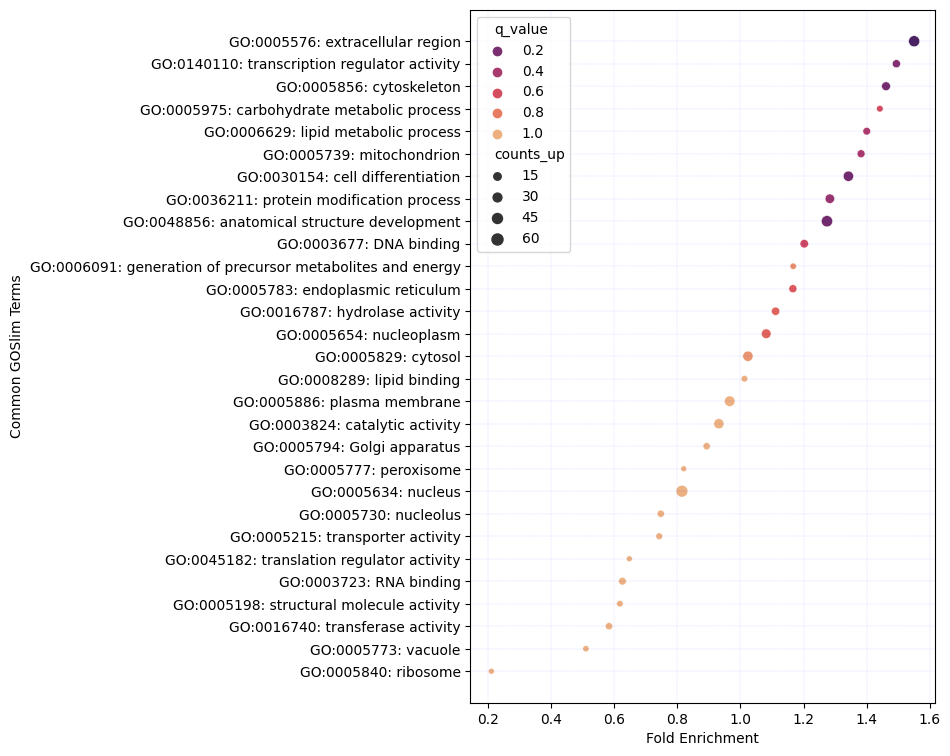

In [10]:
color = sns.color_palette("flare_r", as_cmap=True)

plt.figure(figsize=(6, 9))

dotplot = sns.scatterplot(
    data=human_common,
    x='fold_enrichment',
    y='GOSlim',
    size='counts_up', 
    hue='q_value',     
    palette=color, 
    legend='brief'
)

plt.grid(color='b', linestyle=':', linewidth=0.1)

plt.xlabel('Fold Enrichment')
plt.ylabel('Common GOSlim Terms')

plt.show()

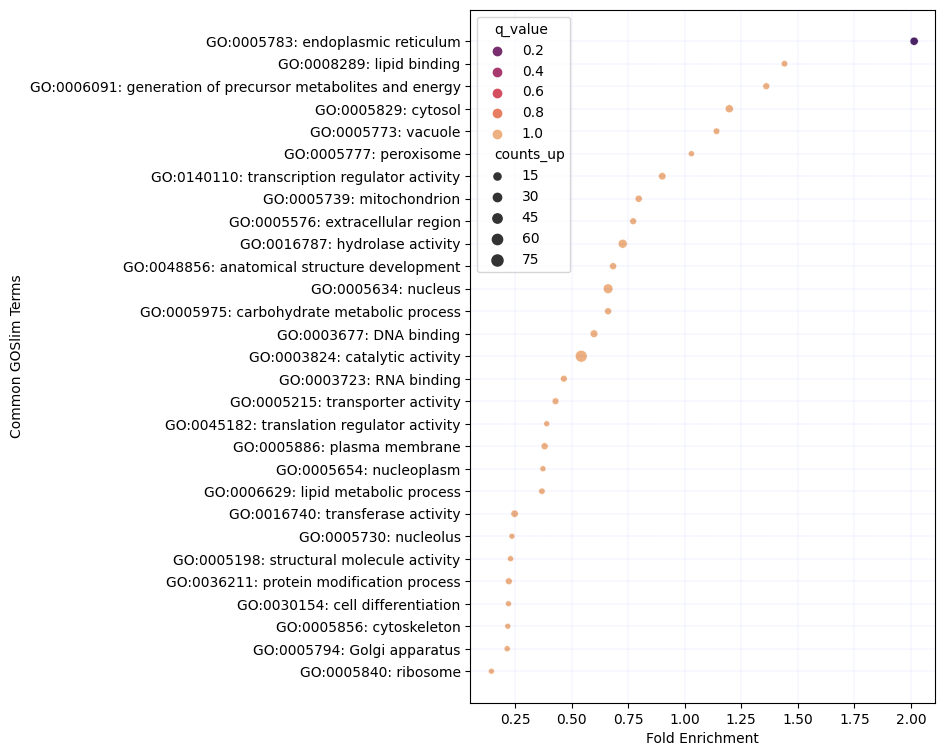

In [11]:
color = sns.color_palette("flare_r", as_cmap=True)

plt.figure(figsize=(6, 9))

dotplot = sns.scatterplot(
    data=rice_common,
    x='fold_enrichment',
    y='GOSlim',
    size='counts_up', 
    hue='q_value',     
    palette=color, 
    legend='brief'
)

plt.grid(color='b', linestyle=':', linewidth=0.1)

plt.xlabel('Fold Enrichment')
plt.ylabel('Common GOSlim Terms')

plt.show()